In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create data

In [2]:
a = [84, 57, 63, 99, 72, 46, 76, 91]
b = [81, 74, 56, 69, 66, 62, 69, 61, 87, 65, 44, 69]
group = ['a'] * len(a) + ['b'] * len(b)

df = pd.DataFrame({'group': group,
                   'value': a + b})

df.head(3)

,group,value
0,a,84
1,a,57
2,a,63


## Calculate means
Group A has a higher mean than Group B. Is this significant?

In [3]:
a_mean = df[df['group']=='a']['value'].mean()
b_mean = df[df['group']=='b']['value'].mean()

print('Group A mean = %2.1f' % a_mean)
print('Group B mean = %2.1f' % b_mean)
print('Mean diff = %2.1f' % (a_mean - b_mean))

Group A mean = 73.5
Group B mean = 66.9
Mean diff = 6.6


## Permutation test
- If we assume null hypothesis, i.e. no difference between groups, then the observed values could have come from either group
- Build a distribution of possible mean differences under the null hypothesis by shuffling values between groups

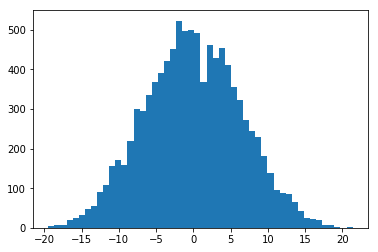

In [4]:
np.random.seed(1)

num_sim = 10000
diff = []

for i in range(num_sim):
    df['group_shuf'] = np.random.permutation(group)
    a_mean = df[df['group_shuf']=='a']['value'].mean()
    b_mean = df[df['group_shuf']=='b']['value'].mean()
    diff.append(a_mean - b_mean)

plt.hist(diff, bins=50)
plt.show()

## Significance
- Using the distribution created we find that 15% of simulated mean differences are 6.6 or above
- So we do not reject null hypothesis at p<0.05

In [5]:
p_val = sum(x >= 6.6 for x in diff) / len(diff)
print("p-value = %0.2f" % p_val)

p-value = 0.15


Reference:
- [Jake Vanderplas - Statistics for Hackers - PyCon 2016](https://www.youtube.com/watch?v=Iq9DzN6mvYA)